In [1]:
# import the necessary components for analysis 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

##   Analysis Proposal
In this section, we will introduce our dataset and propose an analysis, which we will explore and attempt, while simultaneously staying mindful of its various limitations.

### Part I: Data Collection

Source: https://urldefense.com/v3/__https://www.kaggle.com/unanimad/grammy-awards*5Cn__;JQ!!Mih3wA!TGo77VvA7iZPR4wtyddojgugT-iDQOGnoq2LgK4ULRRY8JvtVdA423omOTOwhtbl$ 
The data we obtained from (Kaggle.com) has following attributes:

1) Our dataset contains the information about the nominees, the artists (if the nominee is a piece/ work rather than an artists themselves), workers and the producer. 

2) Our dataset also indicates whether the nominee won the award or not and the type of award they were competing for. 

3) The original datset contains data spanning more than 60 years, and contains tens of thousands of entries, all of which required some wrangling work on our end since we were looking into gender and did not have gender as a variable in our data. As a result, we decided to hand label the data.

Initially our goal was to look at gender discrimmination trends over a longer period of time, but considering the lack of gender labeling, we chose to ask a more realistic question in our implementation: 

* How do the proportions of male and female nominees differ within the 2019 grammy awards? Does this hint at a discrimmination trend that is more significant?

When hand labeling gender, we chose to use a set of 5 categories:

**Female**: Individual female nominee

**Male**: Individual male nominee

**N-female**: Group nominees contains a majority of female performers

**N-male**: Group nominees contains a majority of male performers

**N/A**: Nominees are not given names/Group nominees contains equal male and female performers.

In total, our dataset now contains 433 entries

In [2]:
# Create a data frame 
path=os.path.join("data","the_grammy_awards.csv")
grammy_info=pd.read_csv(path)

In [32]:
grammy_info.head(2)

,nominee,category,artist,workers,winner,Gender,year
0,Bad Guy,Record Of The Year,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True,Female,2019
1,"Hey, Ma",Record Of The Year,Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",True,N-Male,2019


### Part II: Data Wrangling

In this section, we will describe our data with following steps : 

- **STEP1**: What does our data look like? What can we understand from the data's structure?


- **STEP2**: What are the limitations that our data may impose on our analysis and our ability to come to statistical conclusions/ generalize? (Data Wrangling: Motivating factors)


- **STEP3**: How can we handle those limitation to the best of our knowledge? (Data Wrangling: Our Plan)

##### The data we obtained from (Kaggle.com) has following attributes:

1) Our dataset contains the information about the nominees, the artists (if the nominee is a piece/ work rather than an artists themselves), workers and the producer. 

2) Our dataset also indicates whether the nominee won the award or not and the type of award they were competing for. 

3) The original datset contains the data spanning more than 60 years, and contains tens of thousands of entries, most of which were unusable since we were looking into gender and did not have gender as a variable in our data. As a result, we were forced to hand label the data

##### However, the raw data we've obtained is not so perfect and we need to preprocess our data by which we can use in later analysis, and the inperfections and corresponding solutions/limitations are the followings:

1) The dataset we have is too large and contains the infomation that is not very relevant to the questions we are asking. Including all years could easily bias our results towards past discrimmination. We only want to check the gender inequality in contemporary world, not the past. Therefore, our slicing methodology should favor significantly smaller data that is far more modern. 

- We will only take the data from 2019, dropping the columns that are not needed in this analysis so that we can save space and make our dataset look tidy. We will only keep the categories, artists, nominees, workers,and winners columns.

2) We also encounter missing values in our data. However, after careful examination of the data we have, we think the missingness could be handled (imputed), and the very nature of this kind of missingness could be recognized as "Missing by Design", which could be imputed without biasing our sample. We must recognize that dropping missing values is a very bad way of handling missingness in this case!We impute the missing values so that we can fill the gender column manually, with the following rules: 

- **If the nominee is a song of performed single person**, then we identify this person's gender by investigating the background of that song. To be more specific, we will google the gender of the artist if we are not very familiar with the piece of work that is nominated. In this instance, given the inconsistency in the gender belonging to the 'artist' or 'nominee' column it seemed best to handle gender labeling by hand, as a model could have easily mistaken a piece of work for a gender. 


- **If the given music work is performed by a band or ochestra**, we will manually find out the proportions of male and female members of the team. If, let's say, 90 percent of the team members are female, i.e. women are predominant in the team , we will label it as "N-Female". Otherwise, we label "N-Male". If gender composition of a music team is equal or off by a single member, we will label it as "N/A". We will see the proportions and meanings of this choice later within the analysis.


3) Our data has "granularity". That is, among all the nominees of certain year, the proportion of female may varies throughout different groups. We may face "Simpson's Paradox" if the we ignore the granularity of our data and conduct an inferential analysis that is just based on the entire population. Thus, subgroups should also be taken care of.

- We compute the proportion of male and female in each subgroup. We will visualize the data to reflect this, ensuring that we have a strong understanding of subgroups as well.

4) Another major question which may affect the quality of our assessment is the choice of keeping all nominees or just the  

- We chose to keep all nominees of 2019 Grammy Awards because the winner selection proccess concludes in a much smaller sample and by chance may not reflect what actually went into the nominating proccess within a single year. We felt that nominations could give us a stronger picture of whether a potential "discrimminatory" effect might have actually taken place.

5) Another important decision is whether or not to drop duplicate rows. For example, the song “Bad Guy" occurs more than once in the dataset, and may be considered extraneous after the first entry. Nevertheless, we chose to maintain duplicate rows, a decision explained directly below:

- Duplicate rows have their own unique meaning within the dataset. Duplicate rows do not represent human error here, but rather, but rather means that a piece of work received recognition across multiple categories.

In [19]:
# select the columns and select the winners 
columns_needed=["nominee","category","artist","workers","winner","Gender","year"]
grammy_info=grammy_info[columns_needed]
grammy_info=grammy_info[grammy_info["year"]==2019]
grammy_info.head(1)

,nominee,category,artist,workers,winner,Gender,year
0,Bad Guy,Record Of The Year,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True,Female,2019


In [20]:
# do we have labelling error during manual labelling ? 
grammy_info["Gender"].value_counts().index.to_list()

['Male', 'N-Male', 'Equal', 'Female', 'N-Female']

In [21]:
# Data cleaning. Correct the lebelling error 
dict_error_correction={"N-female":"N-Female","N-male":"N-Male"} 
grammy_info["Gender"]=grammy_info["Gender"].replace(dict_error_correction)

In [22]:
# Replace N/A with its actual meaning: the proportion of male is roughly equal to the proportion of female 
grammy_info["Gender"]=grammy_info["Gender"].fillna("Equal")

In [23]:
# No labelling error now !
grammy_info["Gender"].value_counts().index.to_list()

['Male', 'N-Male', 'Equal', 'Female', 'N-Female']

In [15]:
# Duplicate nominees
print('Total nominees: {}'.format(len(grammy_info.nominee)))
print('Total unique nominees: {}'.format(len(grammy_info.nominee.unique())))

Total nominees: 433
Total unique nominees: 388


In [50]:
# Renaming Gender column to match case of other columns
grammy_info["gender"] = grammy_info["Gender"]
grammy_info = grammy_info.drop(columns = ["Gender"])

### Part III:  Descriptive & Exploratory Data Analysis

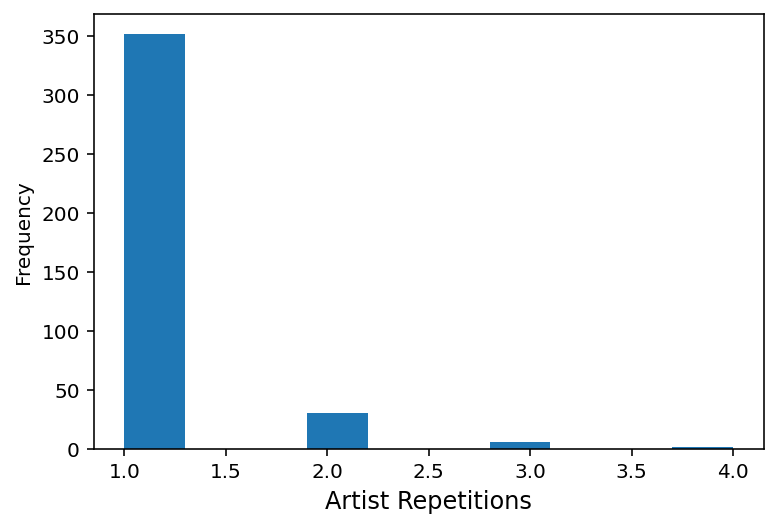

In [41]:
# Visualizing rate of repetition
pl = grammy_info['nominee'].value_counts().plot(kind = 'hist').set_xlabel("Artist Repetitions")
pl.set_fontsize("12")

In [51]:
# EDA contains useful info 
grammy_info[["nominee","category","artist","workers","winner","gender"]].describe()

,nominee,category,artist,workers,winner,gender
count,433,433,256,208,433,433
unique,388,84,216,206,1,5
top,This Land,Record Of The Year,(Various Artists),"Brandi Carlile, Phil Hanseroth, Tim Hanseroth ...",True,Male
freq,4,8,7,2,433,143


Text(0, 0.5, 'Total Count')

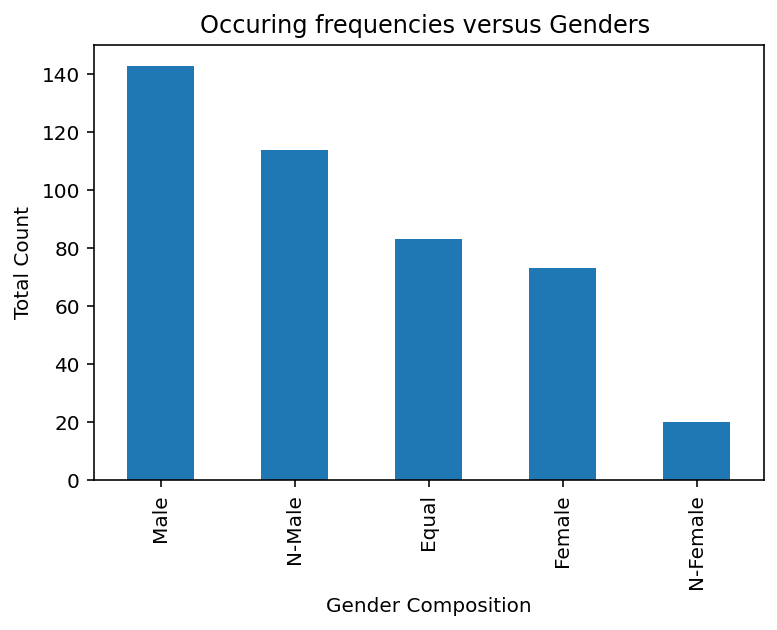

In [52]:
# get the gender distribution so that we can visualize it 
gender_distribution=grammy_info["gender"].value_counts()
plot=gender_distribution.plot.bar(title="Occuring frequencies versus Genders ")
plot.set_xlabel("Gender Composition")
plot.set_ylabel("Total Count")

Text(0, 0.5, 'Percentage')

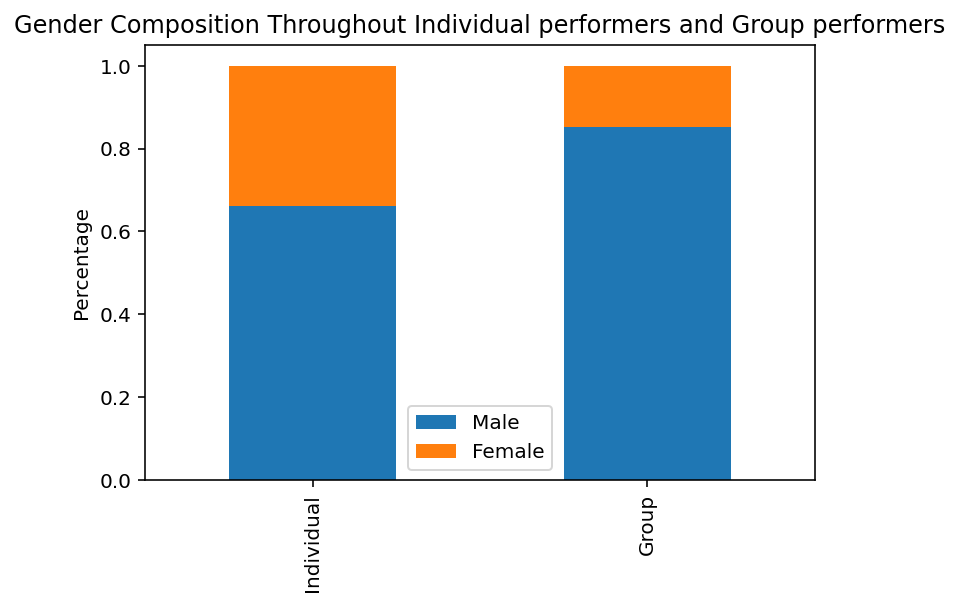

In [54]:
# Get Gender composition for different type of nominees
cond = ['Female', 'Male']
cond2 = ['N-Female', 'N-Male']
idvl_t = grammy_info.loc[grammy_info.gender.isin(cond)].shape[0]
idvl_male=grammy_info.loc[grammy_info.gender == 'Male'].shape[0]/idvl_t
idvl_female=grammy_info.loc[grammy_info.gender == 'Female'].shape[0]/idvl_t
group_t = grammy_info.loc[grammy_info.gender.isin(cond2)].shape[0]
group_male=grammy_info.loc[grammy_info.gender == 'N-Male'].shape[0]/group_t
group_female=grammy_info.loc[grammy_info.gender == 'N-Female'].shape[0]/group_t

df_bar = pd.DataFrame({'Male': [idvl_male, group_male],
                      'Female': [idvl_female, group_female]}, index = ['Individual', 'Group'])
ax = df_bar.plot.bar(stacked=True, mark_right = True, 
                     title='Gender Composition Throughout Individual performers and Group performers')
ax.set_ylabel("Percentage")

We see there are a few more individual male performers than individual female performers. While coming to group performers, there is a much starker difference, with the number of males taking up over 80% of total number of group performers.

In [74]:
# Checking gender distribution after a groupby by category
counts_per_category = grammy_info.groupby(["category", "gender"]).count()
counts_per_category["nominee_number"] = counts_per_category["nominee"]

# Attempting to understand distribution by category 
nominee_gender_counts = pd.DataFrame(counts_per_category["nominee_number"])
nominee_gender_counts.head(20)

nominee_number
category                                     gender                  
Album Of The Year                            Female                 4
                                             Male                   2
                                             N-Female               1
                                             N-Male                 1
Best Album Notes                             N-Male                 5
Best Alternative Music Album                 Equal                  1
                                             Male                   1
                                             N-Male                 3
Best American Roots Performance              Equal                  1
                                             Female                 2
                                             N-Female               1
                                             N-Male                 1
Best American Roots Song                     Equal                  5
Best Americana Album                         Female                 2
                                             Male                   2
                                             N-Male                 1
Best Arrangement, Instrumental or A Cappella Equal                  4
                                             N-Male                 1
Best Arrangement, Instruments and Vocals     Equal                  3
                                             N-Female               2

At first look, it seems that Male and Female distributions vary by category, a factor which might be worth investigating. 

For instance, best Album Notes was an entirely N-Male category, while Album of the Year featured more Female and N-Female winners than Male and N-Male winners. 

While this difference could exist entirely due to random chance, it also might be a factor worthy of investigation throughout our analysis.


Now, it is time to attempt to convey the patterns we have found to an outside audience, in a way that adheres to the principles we're learned in class.

Below, we will iterate on a plot design until we select a plot that we believe may truly convey our findings to an outside audience!

### Part IV: Visualization

### Part V: Extension

Our data portrays that within the 2019 Grammy Nominations, there seems to be a relatively large difference between number of males and females nominated. 

#### However, even with a relatively stark difference shown, in particular among groups, there are a few reasons we cannot generalize our findings:

1) We **did not** conduct a Statistical test for legitimate grammy discrimmination, and thus did not obtain a Statistically significant result indicating that Male and Females proportions **did not** differ by chance.


2) Even if we had wanted to conduct a Statistical test of this form, we couldn't have done it with the data we had selected. Given that we only selected a single year to sample for proportions, we have practically obtained proportions for a single sample, and would need many more of such samples (many more grammy years) to show that our results did not occur completely due to chance. When trying to prove a large social trend such as discrimmination within the grammys, a single sample may only be enough to form an hypothesis - and certainly not enough to validate it.


3) Given the rapid pace of social change, even if we had obtained a larger sample, it would have been a fallacy to use results from 20 years ago to rationalize modern discrimmination. Indicators such as income inequality have certainly improved for women over the past 20 years, though they are far from being equitable. We believe a similar effect could have taken place within the music scene, where the grammys are likely less discrimminatory now then they were 20 or 30 years ago.


**We propose a methodology below for how we would extend these results to attempt to understand whether discrimmination is truly taking place:**

- We would build a Natural Language Processing Model to Autolabel the data, so that we could use the past 30 years. We would attempt to ensure that this data is racially representative and that the model is not very biased for or against any one group by evaluating it on a large and diverse test set. Although this 30 year sample might distort the level of current discrimmination, it does allow us a larger sample which could be used to draw more accurate conclusions


- We could use this to build a Statistical test that we would attempt to generalize to the grammys as a whole, with our null hypothesis being that any gender discrimmination occurs completely due to chance. Without p-hacking, we would attempt to reject this null hypothesis 


- We would build a plot, likely a bar plot, portraying how the proportions of Female artist and N-Female groups change by year to aid our conclusion and communicate them to a broader audience



Although the Natural Language Processing Model might lead to certain inaccuracies, and would raise major ethical concerns (for instance achieving poor performance on certain races due to a lack of available training data), we believe it is the optimal way to obtain enough labeled data to truly test our hypothesis. It would also unlock a relatively medium sized dataset of labeled data, which could unlock exciting Supervised Learning possibilities. Ultimately, we believe that - for a group with ample time - exploring the data with a study of this design could potentially lead to strong results reflecting gender discrimmination within the grammies.

## Thank you!